# 6.4 Ajuste não linear e linearização 

Muitas vezes, temos dados experimentais em que o ajuste como combinação linear nos parâmetros não é adequado e não pode ser considerado. Neste caso, necessitamos de outras famílias de funções para representar adequadamente uma função representada em uma tabela.


## Ajuste hiperbólico

Considere os dados obtidos experimentalmente, conforme ilustrado na figura abaixo

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/6_APROXIMACAO_DE_FUNCOES/imagens/ajuste_hiperbolico.png" width="480">

Observando a o diagrama de dispersão, vemos que a representação dos dados possui um comportamento do tipo:

$$ g(x) = \frac{1}{a_1x+a_2}$$

Para encontrar os parâmetros $a_1$ e $a_2$ da forma como fizemos anteriormente, podemos linearizar a função fazendo

$$ h(x) = \frac{1}{g(x)} = a_1x+a_2 $$

que aproxima a função

$$ \frac{1}{f(x)}$$

e temos agora o caso do ajuste linear, já desenvolvido anteriormente.

Assim, a partir da tabela original, construímos uma nova tabela

\begin{array}{cccc} 
\hline
x_1      &x_2       &... &x_m  \\ \hline
1/f(x_1) &1/f(x_2)  &... &1/f(x_m)  \\ \hline
\end{array} 

   
O problema agora consiste em aproximarmos a função $\frac{1}{f(x)}$ por uma reta $h(x)=a_1x+a_2$, e o sistema de equações normais é dado por 


$$ \begin{cases} 
\left(\sum_{i=1}^{m}x_i^2\right)a_ 1 +\left(\sum_{i=1}^{m} x_i\right) = \sum_{i=1}^{m} \frac{x_i}{f(x_i)}\\ 
\left(\sum_{i=1}^{m}x_i\right)a_ 1 +\left(m \right)a_2 = \sum_{i=1}^{m} \frac{1}{f(x_i)}\\
             \end{cases} $$


### Exemplo 1
Considere a função f (x) tabelada nos pontos, como segue

\begin{array}{cccc} 
\hline
x_1      &-3.0   &-2.0   &-1.0   &-0.5   &-0.4 \\ \hline
f(x_1) &-0.13  &-0.20  &-0.49  &-2.01  &-4.99\\ \hline
\end{array} 

** Solução **
Plotando os pontos tem-se

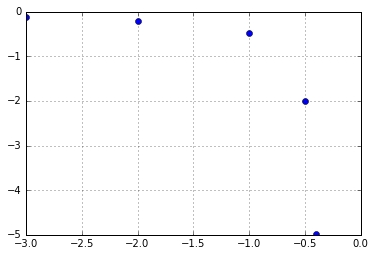

In [5]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([ -3.0, -2.0, -1.0, -0.5, -0.4])
Y = np.array([ -0.13, -0.20, -0.49, -2.01, -4.99])
# plotando
plt.plot(X, Y, "o")
plt.grid()
plt.show()

O que sugere um comportamento de uma função do tipo $$g(x) = \frac{1}{a_1x+a_2}$$. 
Para confirmar, e verificar se a linearização do tipo $$h(x) = \frac{1}{g(x)} = a_1x+a_2$$ irá funcionar, construímos uma nova tabela e plotamos os pontos

[-7.69230769 -5.         -2.04081633 -0.49751244 -0.2004008 ]


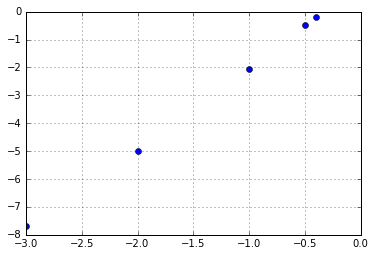

In [19]:
Yl = np.power(Y, -1) 
print(Yl)
# plotando
plt.plot(X, Yl, "o")
plt.grid()
plt.show()

Notamos que os pontos parecem alinhados agora, o que sugere que podemos obter $a_1$ e $a_2$ ajustando uma reta a essa nova tabela

Parâmetros a1= 2.89521778368  e a2 = 0.909193089823


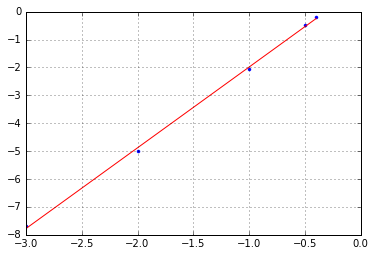

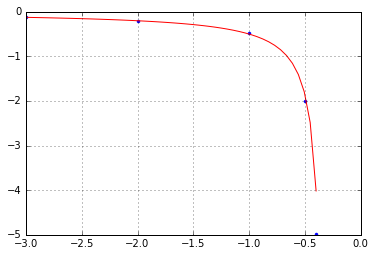

In [21]:
# montando a matriz do sistema
A = np.array([[np.sum(X * X), np.sum(X)],
              [np.sum(X),     len(X)]])
B = np.array([np.sum(X*Yl),
              np.sum(Yl)])
# resolvendo
a = solve(A, B)
print ("Parâmetros a1=", a[0]," e a2 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

#reta
h = lambda X: a[0]*X + a[1]
# plotando
plt.plot(X, Yl, "b.", Xr, h(Xr), "r-") 
plt.grid()
plt.show()
  
# hipérbole
g = lambda X: np.power(a[0]*X+a[1], -1)
Yr = g(Xr)
# plotando
plt.plot(X, Y, "b.", Xr, g(Xr), "r-") 
plt.grid()
plt.show()

## Ajuste exponencial

Podemos obter dados experimentais dispostos conforme ilustrado na figura abaixo, a qual sugere que devemos aproximar a função observada por uma função $g(x)$ da forma $g(x) = a(b)^x$ com os parâmetros $a$ e $b$ positivos.
<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/6_APROXIMACAO_DE_FUNCOES/imagens/ajuste_exp.png" width="480">

O método dos mínimos quadrados desenvolvido anteriormente pode ser usado
fazendo-se a seguinte transformação

$$ h(x) = ln(g(x)) = ln(a(b)^x) = ln(a) + xln(b)$$

Então, fazendo 

$$ a_1 = ln(a) \to e^{a_1}=a$$

$$ a_2 = ln(b) \to e^{a_2}=b$$

temos a linearização 

$$h(x) = a_1 + a_2x$$

Então, construímos ma nova tabela 

\begin{array}{cccc} 
\hline
x_1        &x_2         &... &x_m  \\ \hline
ln(f(x_1)) &ln(f(x_2))  &... &ln(f(x_m))  \\ \hline
\end{array} 

e buscamos os parâmetros $a_1$ e $a_2$ que ajustam uma reta a esses dados, ou seja, buscamos a solução do sistema

$$ \begin{cases} 
\left(\sum_{i=1}^{m}x_i^2\right)a_ 1 +\left(\sum_{i=1}^{m} x_i\right)a_2 =  \sum_{i=1}^{m} ln(f(x_i))x_i \\ 
\left(\sum_{i=1}^{m}x_i\right)a_ 1 +\left(m \right)a_2 = \sum_{i=1}^{m} ln(f(x_i))\\
             \end{cases} $$

[-1.11689997  0.68139335]


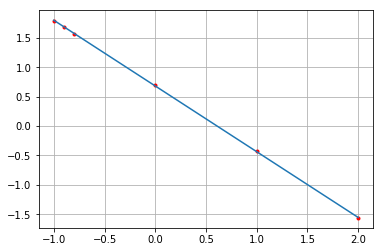

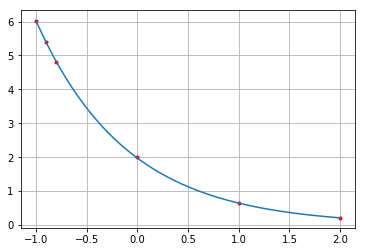

In [2]:
import math
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([ -1, -0.9, -0.8, 0, 1, 2])
Y = np.array([ 6.01, 5.39, 4.8, 2.01, 0.65, 0.21])
Yl = np.log(Y) 

# montando a matriz do sistema
A = np.array([[np.sum(X*X), np.sum(X)],
              [np.sum(X),   len(X)]])
B = np.array([np.sum(X*Yl), np.sum(Yl)])

a = solve(A, B)
print (a)

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 51)
#reta
h = lambda X: a[0]*X + a[1]
# plotando
plt.plot(X, Yl, "r.", Xr, h(Xr), "-") 
plt.grid()
plt.show()
  
# hipérbole
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()